In [13]:
#we as a HR team have hired a new employ(20yrs Exp) and he is demanding 160K+ annual salary.So we need predict the salary of an employee if he has a 20yrs of exp based on our data set using poly regression and cross check the new employee demanding salary(is he bluffing?)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset = pd.read_csv("Position_Salaries.csv")

In [15]:
X=dataset.iloc[ : , 1:2 ].values
y=dataset.iloc[ : , 2 ].values
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X=StandardScaler()
sc_y=StandardScaler()
X= sc_X.fit_transform(X)
y= sc_y.fit_transform(np.array(y).reshape(-1,1))

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')

In [19]:
regressor.fit(X,y)

c:\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

<function matplotlib.pyplot.show(*args, **kw)>

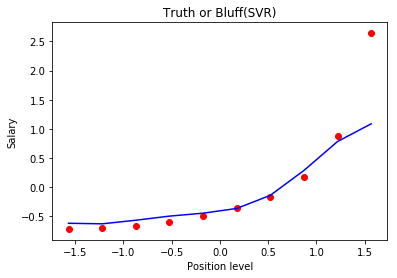

In [20]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show

In [21]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [22]:
print(y_pred)

[170370.0204065]


In [23]:
#here we can see that it is a great prediction as our future employ said he has a 160K+ salary, so he is not bluffing

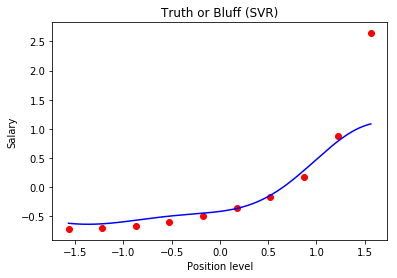

In [24]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()